In [4]:
import scanpy as sc
import numpy as np
from spatial_tools.graph import spatial_connectivity

In [5]:
dataset_name = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
dataset_folder = "20191205_10XVisium_MouseBrainSerial2SA_giovanni.palla"

In [6]:
adata = sc.read_visium(dataset_folder, count_file=f"{dataset_name}_filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


### Build spatial graph for visium data (hexagons)

In [7]:
spatial_connectivity(adata, n_rings=1)

In [8]:
# the adjacency matrix is here
adata.obsp['spatial_connectivity']

<2825x2825 sparse matrix of type '<class 'numpy.float64'>'
	with 16456 stored elements in Compressed Sparse Row format>

In [9]:
adata_plot = adata[np.where(adata.obsp['spatial_connectivity'][123].toarray())[1]].copy()

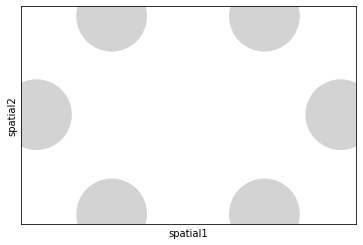

In [11]:
# Plot of the neighborhood of a sample spot
# n_rings = 1
sc.pl.embedding(adata_plot, basis='spatial')

In [12]:
spatial_connectivity(adata, n_rings=2)

In [13]:
adata_plot = adata[np.where(adata.obsp['spatial_connectivity'][123].toarray())[1]].copy()

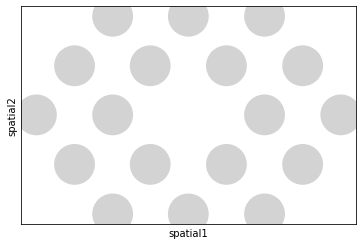

In [15]:
# Plot of the neighborhood of a sample spot
# n_rings = 2
sc.pl.embedding(adata_plot, basis='spatial')

In [16]:
spatial_connectivity(adata, n_rings=3)

C:\Users\sergei.rybakov\Apps\Miniconda3\envs\work\lib\site-packages\scipy\sparse\_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [17]:
adata_plot = adata[np.where(adata.obsp['spatial_connectivity'][123].toarray())[1]].copy()

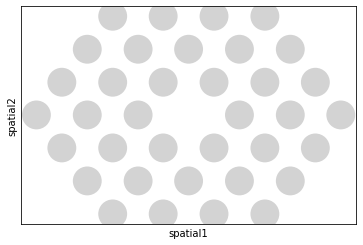

In [19]:
# Plot of the neighborhood of a sample spot
# n_rings = 3
sc.pl.embedding(adata_plot, basis='spatial')

### Build spatial graph for non-visium data

In [ ]:
from spatial_tools import read_seqfish

adata_ob = read_seqfish(BASE_PATH, "ob")
adata_svz = read_seqfish(BASE_PATH, "svz")

adata_svz_5 = adata_svz[adata_svz.obs["Field of View"] == 5].copy()

In [ ]:
# use number of neighbors
spatial_connectivity(adata_svz_5, n_neigh=10, coord_type='seqfish')

In [ ]:
adata.obsp['spatial_connectivity']

In [ ]:
# or use radius
spatial_connectivity(adata_svz_5, radius=16., coord_type='seqfish')

In [ ]:
adata.obsp['spatial_connectivity']